In [829]:
# Importing necesary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [830]:
#Reading and preview of the data
df = pd.read_csv('Leads.csv')

df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [831]:
df.shape

(9240, 37)

In [832]:
# checking statistics
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [833]:
# checking duplicates
df.duplicated().sum()

0

In [834]:
#Looking closer on the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Cleaning the data

In [835]:
# Calculating the  percentage of null values for each column
(df.isnull().sum() / df.shape[0]) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [836]:
##Droping columns with more than 40% of null and other irrelevant columns
df.drop(['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 
                      'Asymmetrique Profile Score', 'How did you hear about X Education'], 
        axis = 1, inplace = True)

df.head(1)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified


However we still have 5 columns thata have a high percentage of nuls and should be treated: Country, Specialization, current occupation, what matters most when choosing a course and city.

In [837]:
#changing the name of the titles that are too long
df.rename(columns={
    'What matters most to you in choosing a course': 'reason_course_selection',
    'receive_more_updates_about_our_courses': 'courses_updates',
    'update_me_on_supply_chain_content': 'supply_chain_updates',
    'get_updates_on_dm_content': 'dm_content_updates',
    'i_agree_to_pay_the_amount_through_cheque': 'agreement_payment',
    'a_free_copy_of_mastering_the_interview': 'mastering_interview','What is your current occupation':'occupation', 'Lead Origin': 'lead_origin', 'Lead Source' : 'lead_source', 'Prospect ID':'Prospect_ID', 'Page Views Per Visit': 'Page_Views_Per_Visit', 'Total Time Spent on Website' : 'Total_Time_on_Website'
}, inplace=True)
df.head(1)

,Prospect_ID,Lead Number,lead_origin,lead_source,Do Not Email,Do Not Call,Converted,TotalVisits,Total_Time_on_Website,Page_Views_Per_Visit,Last Activity,Country,Specialization,occupation,reason_course_selection,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified


In [838]:
# Thre are responses with the select, changing it to NaN as its an empty value
sel_cols = ['Specialization',  'Lead Profile', 'City']

# replace values
df[sel_cols] = df[sel_cols].replace('Select', np.NaN)

In [839]:
#Country
df.Country.value_counts(normalize = True, dropna = False) * 100
#We can see that only the NaN and India sum more than 96%. therefore it is safe to drop this column.

Country
India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya 

In [840]:
df.drop('Country', axis = 1, inplace = True)


In [841]:
#Specialization
df.Specialization.value_counts(normalize = True, dropna = False) * 100

Specialization
NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: proportion, dtype: float64

In [842]:
# categorize all management courses
df.loc[(df.Specialization == 'Finance Management') | (df.Specialization == 'Human Resource Management') | 
       (df.Specialization == 'Marketing Management') |  (df.Specialization == 'Operations Management') |
       (df.Specialization == 'IT Projects Management') | (df.Specialization == 'Supply Chain Management') |
       (df.Specialization == 'Healthcare Management') | (df.Specialization == 'Hospitality Management') |
       (df.Specialization == 'Retail Management') , 'Specialization'] = 'Management'

# categorize all busines courses
df.loc[(df.Specialization == 'Business Administration') | (df.Specialization == 'International Business') | 
       (df.Specialization == 'Rural and Agribusiness') | (df.Specialization == 'E-Business') 
        , 'Specialization'] = 'Business'

# categorize all industry courses
df.loc[(df.Specialization == 'Banking, Investment And Insurance') | (df.Specialization == 'Media and Advertising') |
       (df.Specialization == 'Travel and Tourism') | (df.Specialization == 'Services Excellence') |
       (df.Specialization == 'E-COMMERCE'), 'Specialization'] = 'Industry'
df.Specialization.value_counts(normalize = True) * 100


Specialization
Management    72.576792
Industry      15.290102
Business      12.133106
Name: proportion, dtype: float64

In [843]:
#Current occupation
df.occupation.value_counts(normalize = True, dropna = False) * 100

occupation
Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: proportion, dtype: float64

In [844]:
# combining categppries with low sample sizes
df.loc[(df.occupation == 'Student') | (df.occupation == 'Other') | (df.occupation == 'Housewife') | 
       (df.occupation == 'Businessman') , 'occupation'] = 'Student and Others'
df.occupation.value_counts(normalize = True) * 100

occupation
Unemployed              85.496183
Working Professional    10.778626
Student and Others       3.725191
Name: proportion, dtype: float64

In [845]:
#What matters most when choosing a course, 
df.reason_course_selection.value_counts(normalize = True, dropna = False) * 100


reason_course_selection
Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: proportion, dtype: float64

In [846]:
#same as country these data is very skewed so we drop the column
df.drop('reason_course_selection', axis = 1, inplace = True)

In [847]:
#City column
df.City.value_counts(normalize = True, dropna = False) * 100


City
NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: proportion, dtype: float64

In [848]:
# categorize all non-mumbai, but Maharashtra cities
df.loc[(df.City == 'Thane & Outskirts') | (df.City == 'Other Cities of Maharashtra'), 
       'City'] = 'Maharashtra Cities'

# categorize all other cities
df.loc[(df.City == 'Other Cities') | (df.City == 'Other Metro Cities') | (df.City == 'Tier II Cities') , 
       'City'] = 'Other Cities'
df.City.value_counts(normalize = True) * 100


City
Mumbai                57.835218
Maharashtra Cities    21.701669
Other Cities          20.463113
Name: proportion, dtype: float64

In [849]:
df.City.replace('Select', np.NaN)

0                NaN
1                NaN
2             Mumbai
3             Mumbai
4             Mumbai
            ...     
9235          Mumbai
9236          Mumbai
9237          Mumbai
9238    Other Cities
9239    Other Cities
Name: City, Length: 9240, dtype: object

In [850]:
df.City.value_counts(normalize = True) * 100

City
Mumbai                57.835218
Maharashtra Cities    21.701669
Other Cities          20.463113
Name: proportion, dtype: float64

In [851]:
#handling categorical values
(df.isnull().sum() / df.shape[0]) * 100

Prospect_ID                                  0.000000
Lead Number                                  0.000000
lead_origin                                  0.000000
lead_source                                  0.389610
Do Not Email                                 0.000000
Do Not Call                                  0.000000
Converted                                    0.000000
TotalVisits                                  1.482684
Total_Time_on_Website                        0.000000
Page_Views_Per_Visit                         1.482684
Last Activity                                1.114719
Specialization                              36.580087
occupation                                  29.112554
Search                                       0.000000
Magazine                                     0.000000
Newspaper Article                            0.000000
X Education Forums                           0.000000
Newspaper                                    0.000000
Digital Advertisement       

In [852]:
df.lead_origin.value_counts(normalize = True, dropna = False) * 100


lead_origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64

In [853]:
#we group the categories with the lowest sample sizes as 'others'
df.loc[(df.lead_origin == 'Lead Import') | (df.lead_origin == 'Quick Add Form') | (df.lead_origin == 'Lead Add Form')
       , 'lead_origin'] = 'Others'

In [854]:
df.lead_source.value_counts(normalize = True, dropna = False) * 100


lead_source
Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: proportion, dtype: float64

In [855]:
#I delete the blank rows
df.lead_source.fillna(df.lead_source.mode()[0], inplace=True)

In [856]:
#We group the categories with the lowest sample sizes into 'others'
df.loc[(df.lead_source == 'Welingak Website') | (df.lead_source == 'Referral Sites') | (df.lead_source == 'Facebook') | (df.lead_source == 'bing') | (df.lead_source == 'google') | (df.lead_source == 'Click2call') | (df.lead_source == 'Press_Release') | (df.lead_source == 'Social Media') | (df.lead_source == 'Live Chat') | (df.lead_source == 'youtubechannel') | (df.lead_source == 'testone') | (df.lead_source == 'Pay per Click Ads') | (df.lead_source == 'welearnblog_Home') | (df.lead_source == 'WeLearn') | (df.lead_source == 'blog') | (df.lead_source == 'NC_EDM') 
       , 'lead_source'] = 'Others'
df.lead_source.value_counts(normalize = True, dropna = False) * 100

lead_source
Google            31.428571
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Reference          5.779221
Others             3.787879
Name: proportion, dtype: float64

In [857]:
# determine unique values
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Prospect_ID = 9240
lead_origin = 3
lead_source = 6
Do Not Email = 2
Do Not Call = 2
Last Activity = 17
Specialization = 3
occupation = 3
Search = 2
Magazine = 1
Newspaper Article = 2
X Education Forums = 2
Newspaper = 2
Digital Advertisement = 2
Through Recommendations = 2
Receive More Updates About Our Courses = 1
Tags = 26
Update me on Supply Chain Content = 1
Get updates on DM Content = 1
Lead Profile = 5
City = 3
I agree to pay the amount through cheque = 1
A free copy of Mastering The Interview = 2
Last Notable Activity = 16


In [858]:
#drioping the values that only have unique values
df.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 
                      'I agree to pay the amount through cheque'], 
        axis = 1, inplace = True)

In [859]:
#creating a new df with only binary columns
df_bin = df[['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
           'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']]

# checking value counts for each of the columns
for i in df_bin.columns:
    x = (df_bin[i].value_counts(normalize = True)) * 100
    print(x)
    print()

Do Not Email
No     92.056277
Yes     7.943723
Name: proportion, dtype: float64

Do Not Call
No     99.978355
Yes     0.021645
Name: proportion, dtype: float64

Search
No     99.848485
Yes     0.151515
Name: proportion, dtype: float64

Newspaper Article
No     99.978355
Yes     0.021645
Name: proportion, dtype: float64

X Education Forums
No     99.989177
Yes     0.010823
Name: proportion, dtype: float64

Newspaper
No     99.989177
Yes     0.010823
Name: proportion, dtype: float64

Digital Advertisement
No     99.95671
Yes     0.04329
Name: proportion, dtype: float64

Through Recommendations
No     99.924242
Yes     0.075758
Name: proportion, dtype: float64

A free copy of Mastering The Interview
No     68.744589
Yes    31.255411
Name: proportion, dtype: float64



In [860]:
#drioping the values as the responses are heavely imbalanced 
df.drop(['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
           'Newspaper', 'Digital Advertisement', 'Through Recommendations'], 
        axis = 1, inplace = True)

In [861]:
df.Prospect_ID = df.Prospect_ID .astype('object')

In [862]:
df.TotalVisits.fillna(df.TotalVisits.median(), inplace=True)
df.TotalVisits = df.TotalVisits.astype('int')

In [863]:
df.Page_Views_Per_Visit.fillna(df.Page_Views_Per_Visit.median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect_ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   lead_origin                             9240 non-null   object 
 3   lead_source                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   int32  
 6   Total_Time_on_Website                   9240 non-null   int64  
 7   Page_Views_Per_Visit                    9240 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Specialization                          5860 non-null   object 
 10  occupation                              6550 non-null   obje

## Exploratory Data Analysis


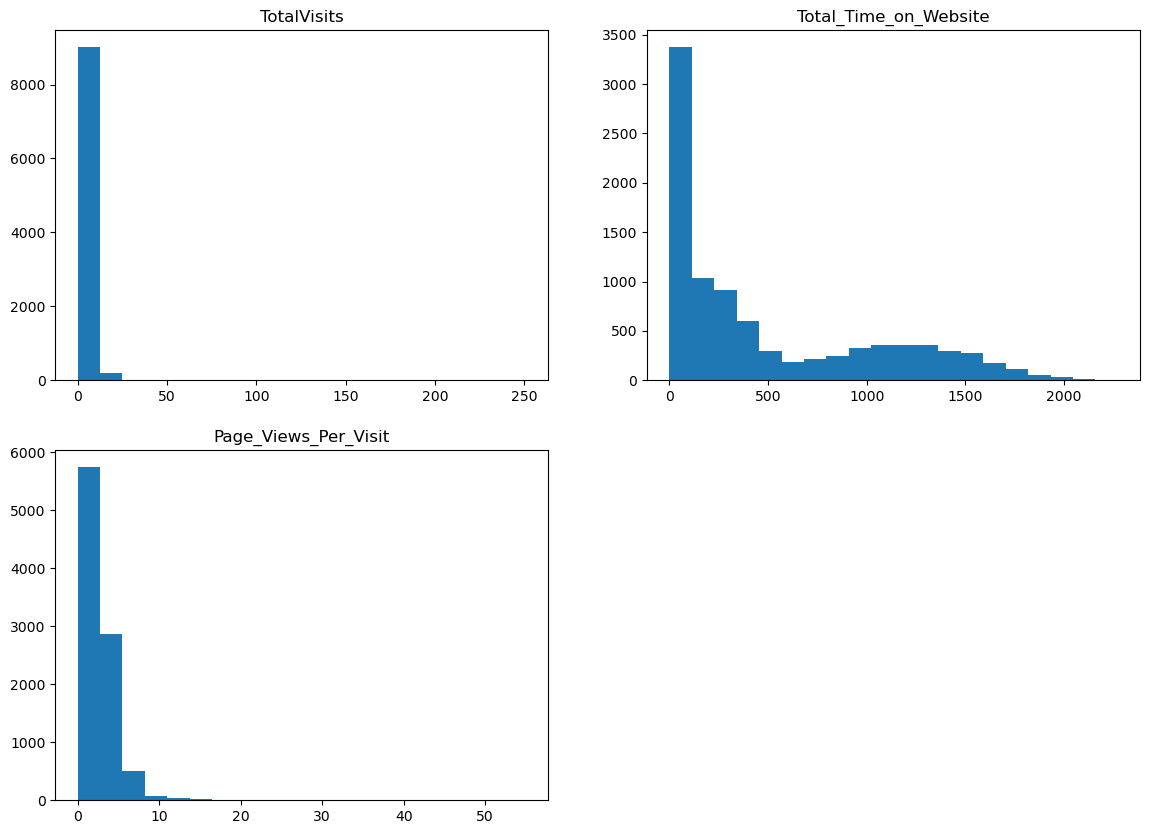

In [864]:
# Setting the plots
fig = plt.figure(figsize = (14, 10))
plt.subplot(2, 2, 1)
plt.hist(df.TotalVisits, bins = 20)
plt.title('TotalVisits')

plt.subplot(2, 2, 2)
plt.hist(df.Total_Time_on_Website, bins = 20)
plt.title('Total_Time_on_Website')

plt.subplot(2, 2, 3)
plt.hist(df.Page_Views_Per_Visit, bins = 20)
plt.title('Page_Views_Per_Visit')

plt.show()

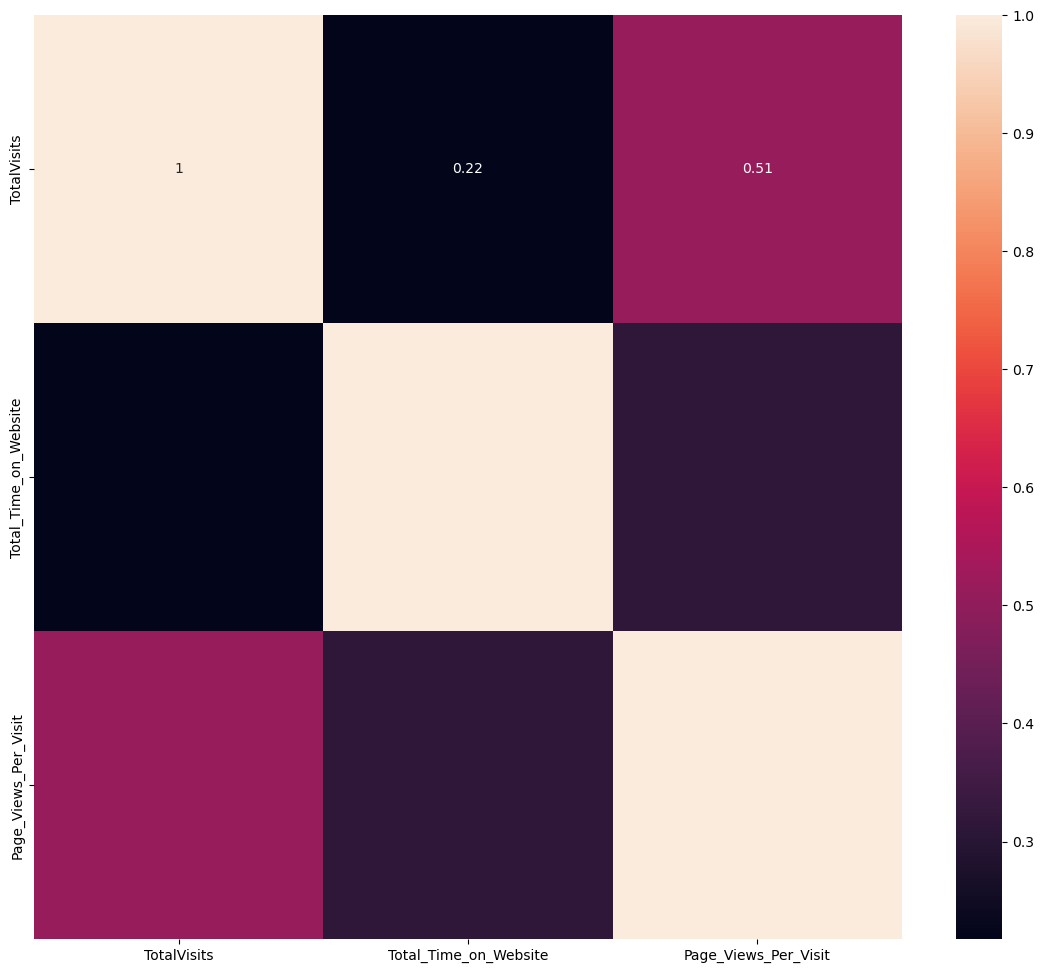

In [865]:
plt.figure(figsize = (14,12))
sns.heatmap(df[['TotalVisits', 'Total_Time_on_Website', 'Page_Views_Per_Visit']].corr(), annot = True)
plt.show()

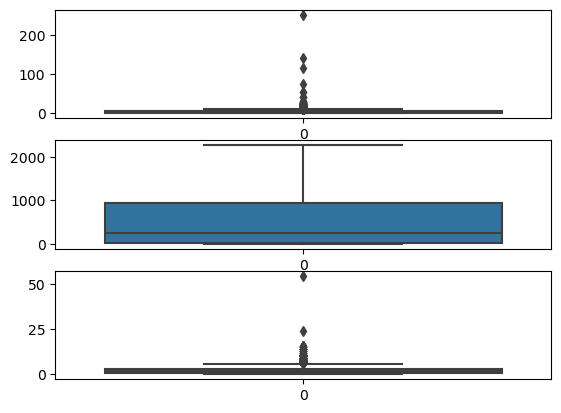

In [866]:
#checking for outliers

plt.subplot(3,1,1)
sns.boxplot(df.TotalVisits)

plt.subplot(3,1,2)
sns.boxplot(df.Total_Time_on_Website)

plt.subplot(3,1,3)
sns.boxplot(df.Page_Views_Per_Visit)
plt.show()

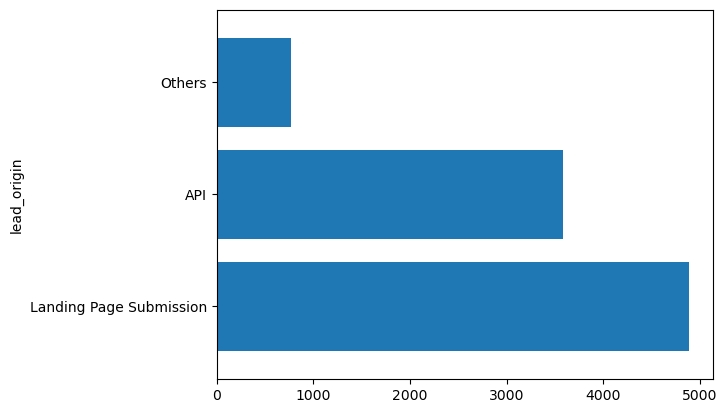

In [867]:
df.groupby('lead_origin')['Lead Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8)
plt.show()

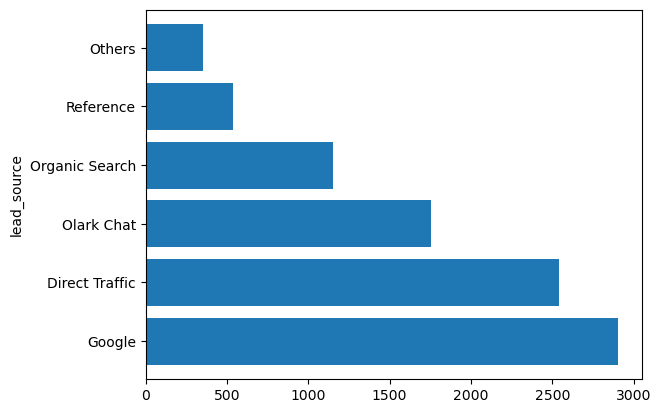

In [868]:
df.groupby('lead_source')['Lead Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8)
plt.show()

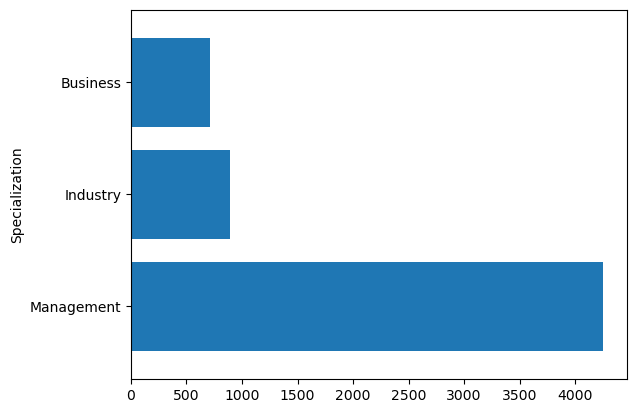

In [869]:
df.groupby('Specialization')['Lead Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8)
plt.show()

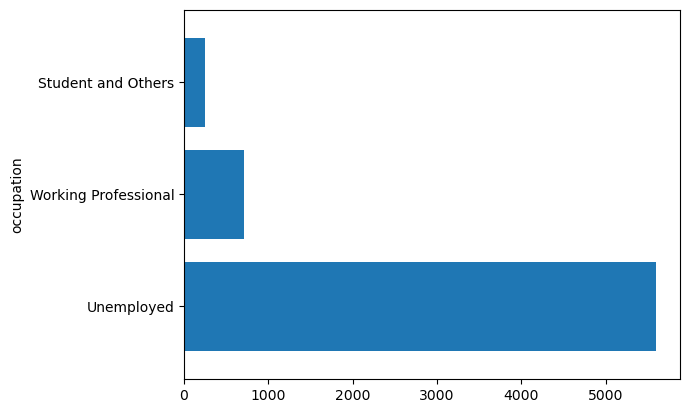

In [870]:
df.groupby('occupation')['Lead Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8)
plt.show()

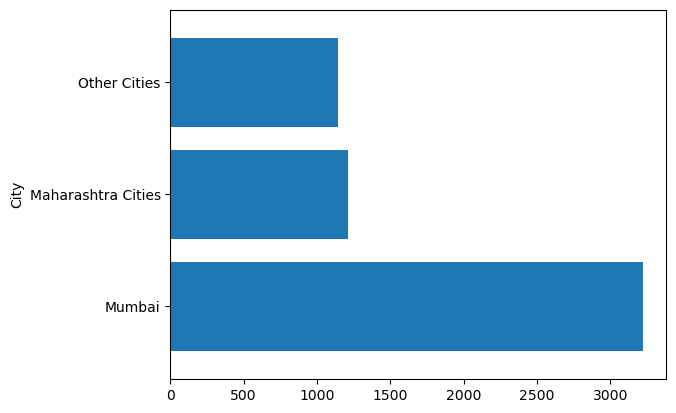

In [871]:
df.groupby('City')['Lead Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8)
plt.show()

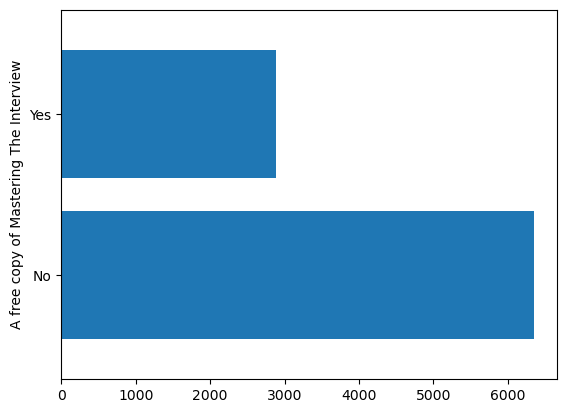

In [872]:
df.groupby('A free copy of Mastering The Interview')['Lead Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8)
plt.show()

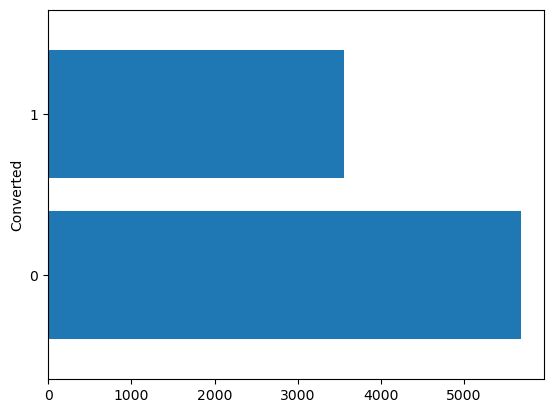

In [873]:
df.groupby('Converted')['Lead Number'].count().sort_values(ascending = False).plot(kind= 'barh', width = 0.8)
plt.show()

## Data Preparation


In [874]:
# determine unique values
for k, v in df.select_dtypes(include='object').nunique().to_dict().items():
    print('{} = {}'.format(k,v))

Prospect_ID = 9240
lead_origin = 3
lead_source = 6
Last Activity = 17
Specialization = 3
occupation = 3
Tags = 26
Lead Profile = 5
City = 3
A free copy of Mastering The Interview = 2
Last Notable Activity = 16


In [875]:
binarylist = ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[binarylist] = df[binarylist].apply(binary_map)

# check the operation was success
df.head()

,Prospect_ID,Lead Number,lead_origin,lead_source,Converted,TotalVisits,Total_Time_on_Website,Page_Views_Per_Visit,Last Activity,Specialization,occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,Page Visited on Website,NaN,Unemployed,Interested in other courses,NaN,NaN,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2.5,Email Opened,NaN,Unemployed,Ringing,NaN,NaN,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,Business,Student and Others,Will revert after reading the email,Potential Lead,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1.0,Unreachable,Industry,Unemployed,Ringing,NaN,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1.0,Converted to Lead,NaN,Unemployed,Will revert after reading the email,NaN,Mumbai,0,Modified


In [876]:
#Creating dummy variable for columns with categorical responses
dummy1 = pd.get_dummies(df[['lead_origin', 'lead_source', 'Specialization', 'occupation', 'City']], drop_first = True)

df = pd.concat([df, dummy1], axis=1)
df.head()

,Prospect_ID,Lead Number,lead_origin,lead_source,Converted,TotalVisits,Total_Time_on_Website,Page_Views_Per_Visit,Last Activity,Specialization,occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,lead_origin_Landing Page Submission,lead_origin_Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Others,lead_source_Reference,Specialization_Industry,Specialization_Management,occupation_Unemployed,occupation_Working Professional,City_Mumbai,City_Other Cities
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,Page Visited on Website,NaN,Unemployed,Interested in other courses,NaN,NaN,0,Modified,False,False,False,True,False,False,False,False,False,True,False,False,False
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5,674,2.5,Email Opened,NaN,Unemployed,Ringing,NaN,NaN,0,Email Opened,False,False,False,False,True,False,False,False,False,True,False,False,False
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2,1532,2.0,Email Opened,Business,Student and Others,Will revert after reading the email,Potential Lead,Mumbai,1,Email Opened,True,False,False,False,False,False,False,False,False,False,False,True,False
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1,305,1.0,Unreachable,Industry,Unemployed,Ringing,NaN,Mumbai,0,Modified,True,False,False,False,False,False,False,True,False,True,False,True,False
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2,1428,1.0,Converted to Lead,NaN,Unemployed,Will revert after reading the email,NaN,Mumbai,0,Modified,True,False,True,False,False,False,False,False,False,True,False,True,False


In [877]:
# Dropping the columns for which dummies have been created
df.drop(['lead_origin', 'lead_source', 'Specialization', 'occupation', 'City', 'Prospect_ID'], axis = 1, inplace = True)

df.head()

,Lead Number,Converted,TotalVisits,Total_Time_on_Website,Page_Views_Per_Visit,Last Activity,Tags,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity,lead_origin_Landing Page Submission,lead_origin_Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Others,lead_source_Reference,Specialization_Industry,Specialization_Management,occupation_Unemployed,occupation_Working Professional,City_Mumbai,City_Other Cities
0,660737,0,0,0,0.0,Page Visited on Website,Interested in other courses,NaN,0,Modified,False,False,False,True,False,False,False,False,False,True,False,False,False
1,660728,0,5,674,2.5,Email Opened,Ringing,NaN,0,Email Opened,False,False,False,False,True,False,False,False,False,True,False,False,False
2,660727,1,2,1532,2.0,Email Opened,Will revert after reading the email,Potential Lead,1,Email Opened,True,False,False,False,False,False,False,False,False,False,False,True,False
3,660719,0,1,305,1.0,Unreachable,Ringing,NaN,0,Modified,True,False,False,False,False,False,False,True,False,True,False,True,False
4,660681,1,2,1428,1.0,Converted to Lead,Will revert after reading the email,NaN,0,Modified,True,False,True,False,False,False,False,False,False,True,False,True,False


In [878]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Converted                               9240 non-null   int64  
 2   TotalVisits                             9240 non-null   int32  
 3   Total_Time_on_Website                   9240 non-null   int64  
 4   Page_Views_Per_Visit                    9240 non-null   float64
 5   Last Activity                           9137 non-null   object 
 6   Tags                                    5887 non-null   object 
 7   Lead Profile                            2385 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   int64  
 9   Last Notable Activity                   9240 non-null   object 
 10  lead_origin_Landing Page Submission     9240 non-null   bool

In [879]:
num_cols = df[['TotalVisits', 'Total_Time_on_Website', 'Page_Views_Per_Visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total_Time_on_Website,Page_Views_Per_Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [880]:
# capping at 99 percentile to reduce the number of outliers
df.TotalVisits.loc[df.TotalVisits >= df.TotalVisits.quantile(0.99)] = df.TotalVisits.quantile(0.99)
df.Page_Views_Per_Visit.loc[df.Page_Views_Per_Visit >= 
                            df.Page_Views_Per_Visit.quantile(0.99)] = df.Page_Views_Per_Visit.quantile(0.99)

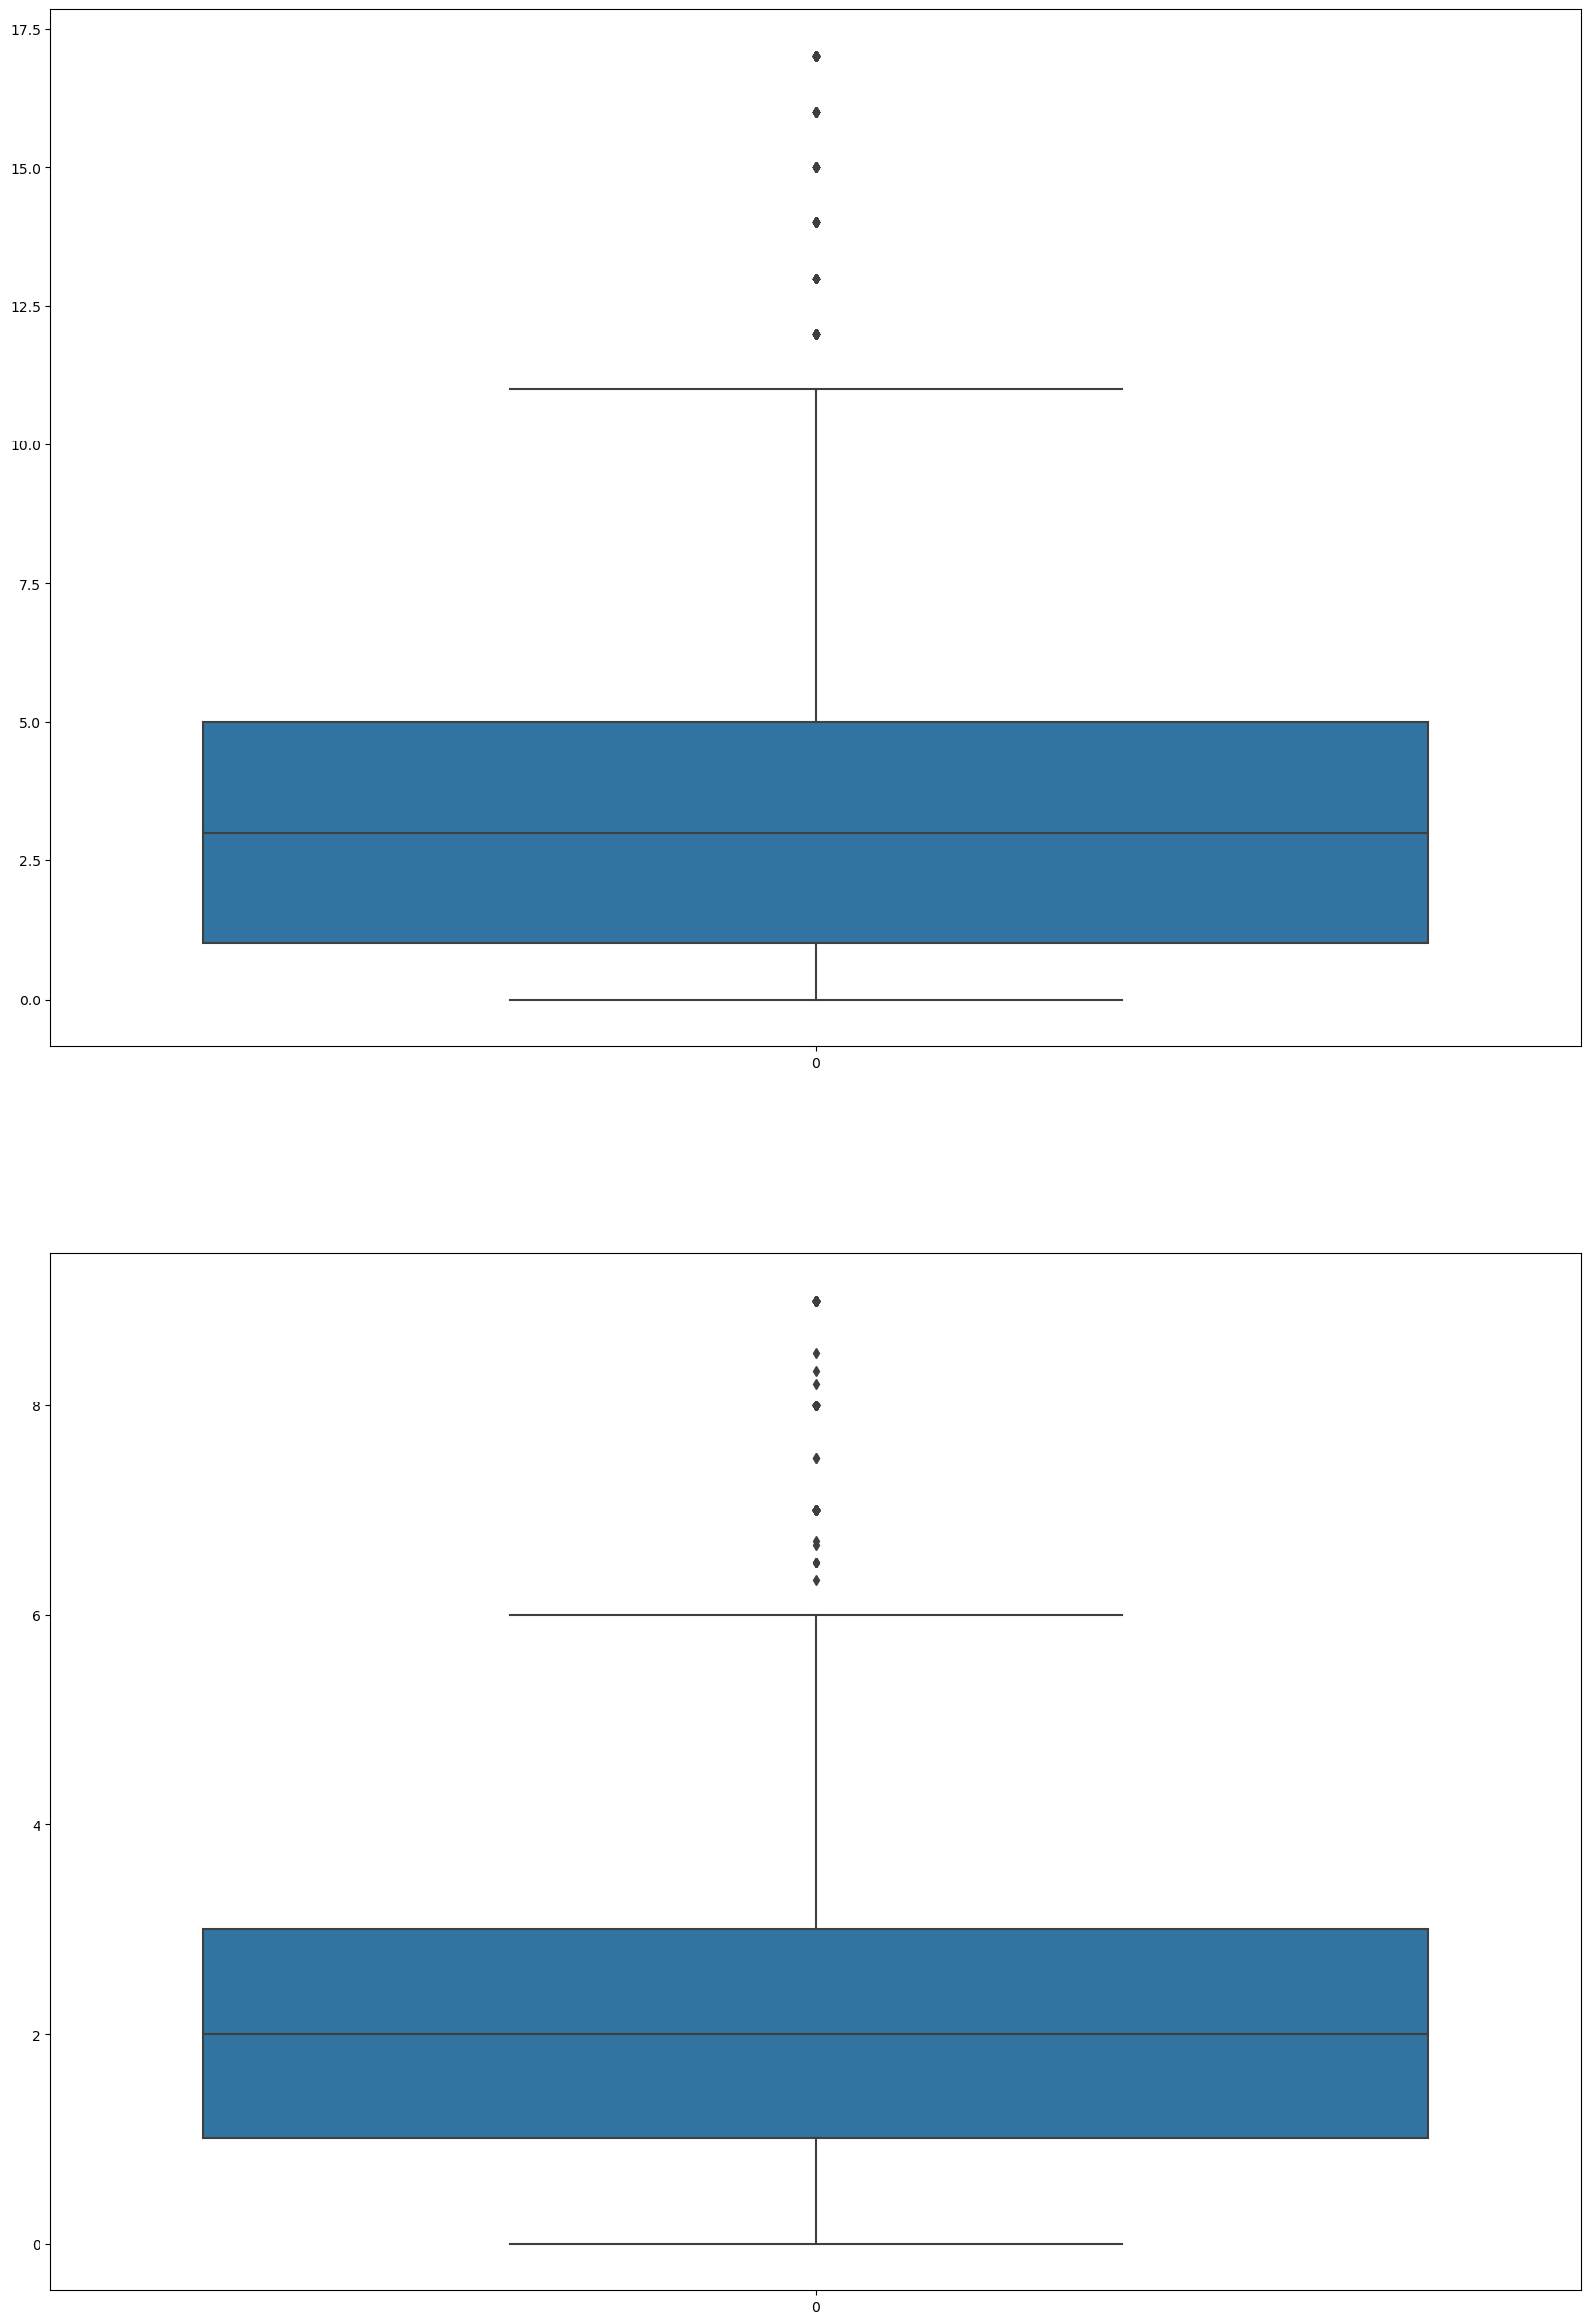

In [881]:
plt.figure(figsize = (20, 30))
plt.subplot(2,1,1)
sns.boxplot(df.TotalVisits)

plt.subplot(2,1,2)
sns.boxplot(df.Page_Views_Per_Visit)
plt.show()


Test-Train Split

In [882]:
# Putting feature variable to X
X = df.drop(['Lead Number', 'Converted'], axis=1)

X.head(1)

,TotalVisits,Total_Time_on_Website,Page_Views_Per_Visit,Last Activity,Tags,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity,lead_origin_Landing Page Submission,lead_origin_Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Others,lead_source_Reference,Specialization_Industry,Specialization_Management,occupation_Unemployed,occupation_Working Professional,City_Mumbai,City_Other Cities
0,0,0,0.0,Page Visited on Website,Interested in other courses,NaN,0,Modified,False,False,False,True,False,False,False,False,False,True,False,False,False


In [883]:
# Putting response variable to y
y = df['Converted']

y.head(1)

0    0
Name: Converted, dtype: int64

In [884]:
df['Converted'] = df['Converted'].astype(float)

In [885]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [886]:
scaler = StandardScaler()

X_train[['TotalVisits','Total_Time_on_Website','Page_Views_Per_Visit']] = scaler.fit_transform(
    X_train[['TotalVisits','Total_Time_on_Website','Page_Views_Per_Visit']])

X_train.head()

,TotalVisits,Total_Time_on_Website,Page_Views_Per_Visit,Last Activity,Tags,Lead Profile,A free copy of Mastering The Interview,Last Notable Activity,lead_origin_Landing Page Submission,lead_origin_Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Others,lead_source_Reference,Specialization_Industry,Specialization_Management,occupation_Unemployed,occupation_Working Professional,City_Mumbai,City_Other Cities
1871,-1.022595,-0.885371,-1.180474,Email Opened,Ringing,NaN,0,Email Opened,False,False,False,True,False,False,False,False,True,True,False,False,False
6795,0.205373,0.005716,-0.503379,Email Opened,NaN,NaN,1,Email Opened,True,False,False,False,False,False,False,False,False,True,False,False,True
3516,0.512365,-0.691418,0.092260,Email Opened,Ringing,NaN,0,Email Opened,False,False,False,True,False,False,False,False,False,True,False,False,False
8105,0.512365,1.365219,1.364995,SMS Sent,Ringing,NaN,0,SMS Sent,True,False,True,False,False,False,False,True,False,True,False,True,False
3934,-1.022595,-0.885371,-1.180474,Email Opened,NaN,NaN,0,Modified,False,False,False,True,False,False,False,False,False,True,False,False,False


In [887]:
# checking the conversion rate
conversion = (sum(df['Converted'])/len(df['Converted'].index))*100
conversion

38.53896103896104

In [888]:
#filtering out only the numerical (integers, floats) and boolean columns.
numeric_bool_df = df.select_dtypes(include=['int64', 'float64', 'int32', 'bool'])

print("Columns considered for correlation:")
print(numeric_bool_df.columns)

Columns considered for correlation:
Index(['Lead Number', 'Converted', 'TotalVisits', 'Total_Time_on_Website',
       'Page_Views_Per_Visit', 'A free copy of Mastering The Interview',
       'lead_origin_Landing Page Submission', 'lead_origin_Others',
       'lead_source_Google', 'lead_source_Olark Chat',
       'lead_source_Organic Search', 'lead_source_Others',
       'lead_source_Reference', 'Specialization_Industry',
       'Specialization_Management', 'occupation_Unemployed',
       'occupation_Working Professional', 'City_Mumbai', 'City_Other Cities'],
      dtype='object')


In [889]:
#checking the correlation
corr_matrix = numeric_bool_df.corr()

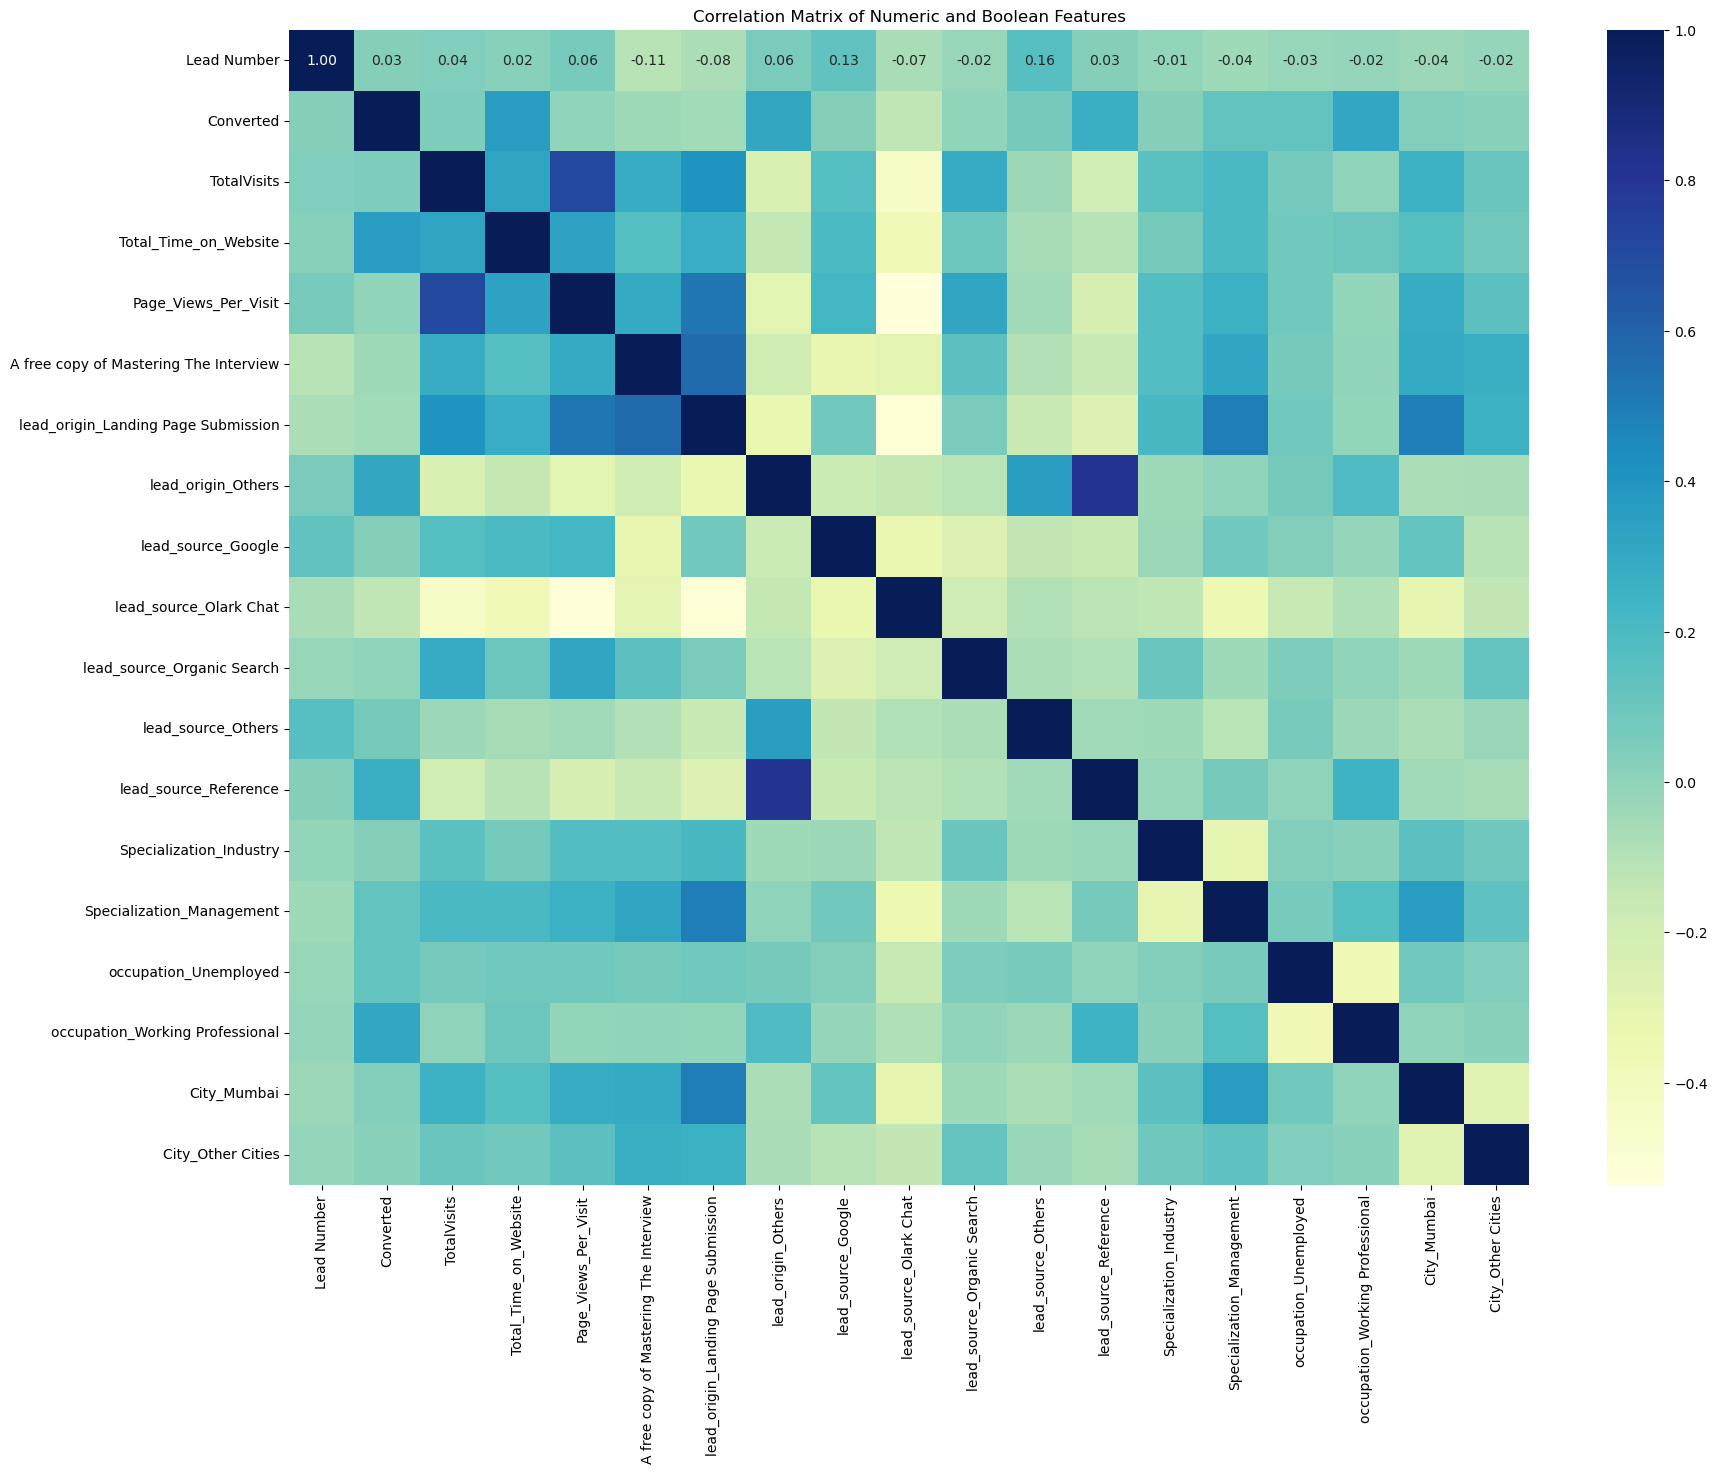

In [890]:
plt.figure(figsize=(20,15)) 
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix of Numeric and Boolean Features")
plt.show()

In [891]:
X_test.drop(['lead_origin_Others', 'Specialization_Industry', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

X_train.drop(['lead_origin_Others', 'Specialization_Industry', 
                     'occupation_Working Professional'], axis = 1, inplace = True)

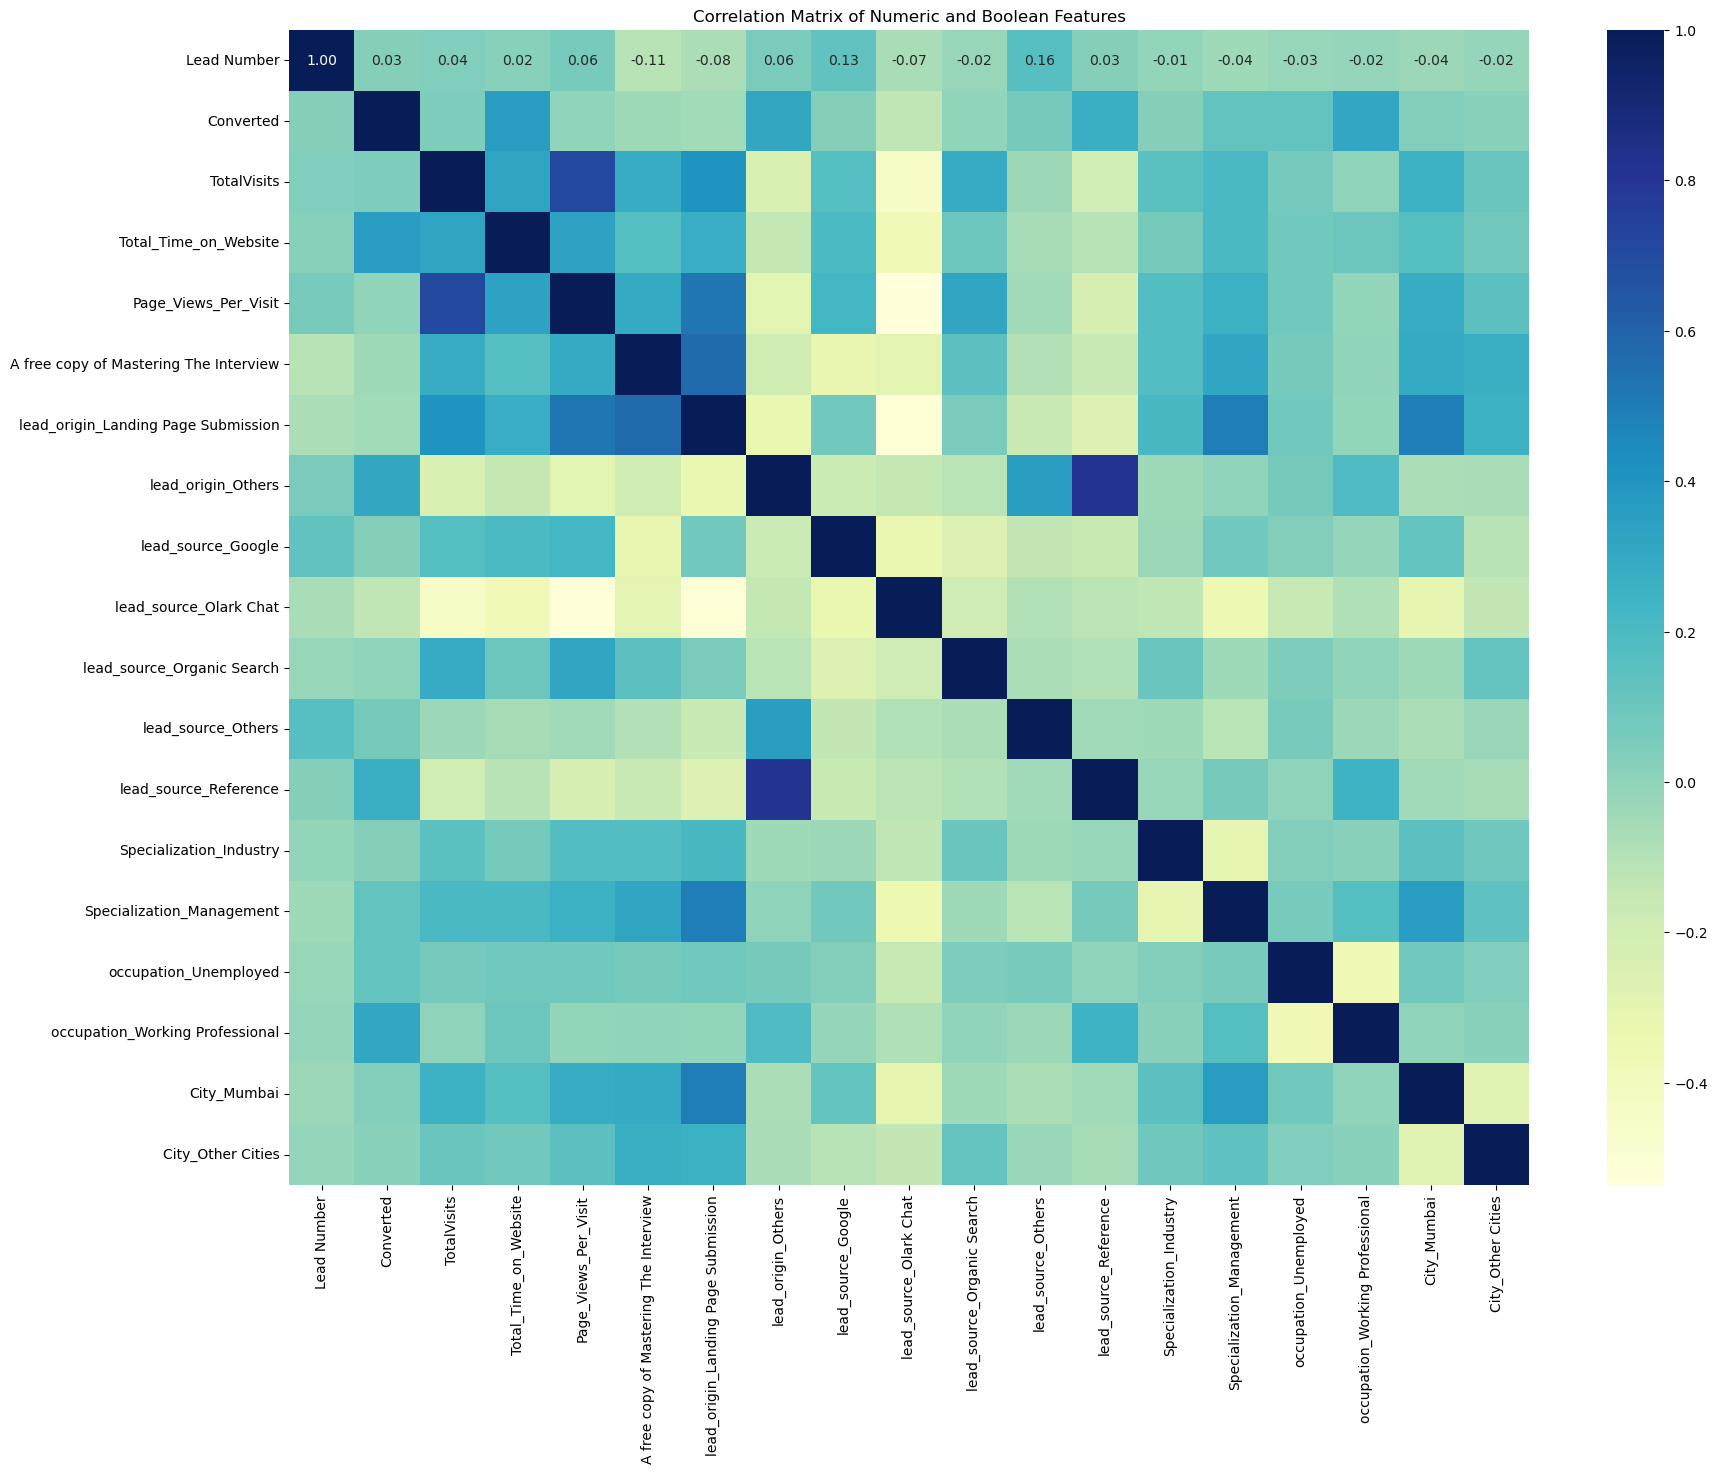

In [892]:
plt.figure(figsize=(20,15)) 
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix of Numeric and Boolean Features")
plt.show()

# Model Building

In [893]:
categorical_vals= df.select_dtypes(include=['object']).columns
categorical_vals

Index(['Last Activity', 'Tags', 'Lead Profile', 'Last Notable Activity'], dtype='object')

In [894]:
for i in categorical_vals:
    print(i)
    print(df[i].value_counts())
    print(" ")

Last Activity
Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64
 
Tags
Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off   

In [895]:
# We can see that 'A free copy of Mastering The Interview','Do Not Email' has yes and no's which can 
#converted to1's and 0's

map_var =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable list
df[map_var] = df[map_var].apply(binary_map)
df[map_var].head()

,A free copy of Mastering The Interview
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [896]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

# Print the first few rows of the DataFrame
print(df.head())

   Lead Number  Converted  TotalVisits  Total_Time_on_Website  \
0       660737        0.0            0                      0   
1       660728        0.0            5                    674   
2       660727        1.0            2                   1532   
3       660719        0.0            1                    305   
4       660681        1.0            2                   1428   

   Page_Views_Per_Visit            Last Activity  \
0                   0.0  Page Visited on Website   
1                   2.5             Email Opened   
2                   2.0             Email Opened   
3                   1.0              Unreachable   
4                   1.0        Converted to Lead   

                                  Tags    Lead Profile  \
0          Interested in other courses             NaN   
1                              Ringing             NaN   
2  Will revert after reading the email  Potential Lead   
3                              Ringing             NaN   
4  Wil

In [897]:
df.fillna('Unknown', inplace=True)

# Convert categorical variables to dummy variables
categorical_cols = ['Last Activity', 'Tags', 'Lead Profile', 'Last Notable Activity']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

# Convert all remaining columns that might contain boolean or float to integer
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

# Display the DataFrame to confirm the changes
print(df.head())

   Lead Number  Converted  TotalVisits  Total_Time_on_Website  \
0       660737          0            0                      0   
1       660728          0            5                    674   
2       660727          1            2                   1532   
3       660719          0            1                    305   
4       660681          1            2                   1428   

   Page_Views_Per_Visit A free copy of Mastering The Interview  \
0                     0                                Unknown   
1                     2                                Unknown   
2                     2                                Unknown   
3                     1                                Unknown   
4                     1                                Unknown   

   lead_origin_Landing Page Submission  lead_origin_Others  \
0                                    0                   0   
1                                    0                   0   
2                         

In [898]:
# Checking if we have any categorical variable present in the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 82 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Lead Number                                             9240 non-null   int64 
 1   Converted                                               9240 non-null   int32 
 2   TotalVisits                                             9240 non-null   int32 
 3   Total_Time_on_Website                                   9240 non-null   int64 
 4   Page_Views_Per_Visit                                    9240 non-null   int32 
 5   A free copy of Mastering The Interview                  9240 non-null   object
 6   lead_origin_Landing Page Submission                     9240 non-null   int32 
 7   lead_origin_Others                                      9240 non-null   int32 
 8   lead_source_Google                              

In [899]:
df.drop('A free copy of Mastering The Interview', axis=1, inplace=True)


In [900]:
from sklearn.model_selection import train_test_split

y = df['Converted'] # Target Variable

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int32

In [901]:
# Independent Variables
X=df.drop('Converted', axis=1)
X.head()

,Lead Number,TotalVisits,Total_Time_on_Website,Page_Views_Per_Visit,lead_origin_Landing Page Submission,lead_origin_Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Others,lead_source_Reference,Specialization_Industry,Specialization_Management,occupation_Unemployed,occupation_Working Professional,City_Mumbai,City_Other Cities,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,5,674,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,2,1532,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,1,305,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,2,1428,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [902]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.head()

,Lead Number,TotalVisits,Total_Time_on_Website,Page_Views_Per_Visit,lead_origin_Landing Page Submission,lead_origin_Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Others,lead_source_Reference,Specialization_Industry,Specialization_Management,occupation_Unemployed,occupation_Working Professional,City_Mumbai,City_Other Cities,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,641410,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,597687,4,487,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,626825,5,106,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,587928,5,1230,5,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,622366,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [903]:
X_test.head()

,Lead Number,TotalVisits,Total_Time_on_Website,Page_Views_Per_Visit,lead_origin_Landing Page Submission,lead_origin_Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Others,lead_source_Reference,Specialization_Industry,Specialization_Management,occupation_Unemployed,occupation_Working Professional,City_Mumbai,City_Other Cities,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,619003,8,1011,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,636884,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,590281,5,59,5,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,579892,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,617929,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [904]:
y_train.head()

1871    0
6795    0
3516    0
8105    0
3934    0
Name: Converted, dtype: int32

In [905]:
y_test.head()

4269    1
2376    1
7766    1
9199    0
4359    1
Name: Converted, dtype: int32

In [906]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6468 entries, 1871 to 5640
Data columns (total 80 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   Lead Number                                             6468 non-null   int64
 1   TotalVisits                                             6468 non-null   int32
 2   Total_Time_on_Website                                   6468 non-null   int64
 3   Page_Views_Per_Visit                                    6468 non-null   int32
 4   lead_origin_Landing Page Submission                     6468 non-null   int32
 5   lead_origin_Others                                      6468 non-null   int32
 6   lead_source_Google                                      6468 non-null   int32
 7   lead_source_Olark Chat                                  6468 non-null   int32
 8   lead_source_Organic Search                              6468

In [907]:
X_train.shape

(6468, 80)

In [908]:
y_train.shape

(6468,)

In [909]:
X_test.shape

(2772, 80)

In [910]:
y_test.shape

(2772,)

In [911]:
#Importing Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Selecting numerical cols for scaling 

numerical_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_train.head()

,Lead Number,TotalVisits,Total_Time_on_Website,Page_Views_Per_Visit,lead_origin_Landing Page Submission,lead_origin_Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Others,lead_source_Reference,Specialization_Industry,Specialization_Management,occupation_Unemployed,occupation_Working Professional,City_Mumbai,City_Other Cities,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,1.036534,0,-0.885371,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,-0.834353,4,0.005716,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0.412448,5,-0.691418,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,-1.251936,5,1.365219,5,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0.221650,0,-0.885371,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [912]:
logreg = LogisticRegression()

# Running RFE with 15 variables as the number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [913]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True, False, False, False,  True, False,  True,
       False,  True, False, False,  True,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False])

In [914]:
Zipped_data = zip(X_train.columns, rfe.support_, rfe.ranking_)
Zipped_data = list(Zipped_data)
Zipped_data

[('Lead Number', False, 47),
 ('TotalVisits', False, 53),
 ('Total_Time_on_Website', False, 10),
 ('Page_Views_Per_Visit', False, 52),
 ('lead_origin_Landing Page Submission', False, 26),
 ('lead_origin_Others', False, 6),
 ('lead_source_Google', False, 39),
 ('lead_source_Olark Chat', False, 11),
 ('lead_source_Organic Search', False, 56),
 ('lead_source_Others', False, 30),
 ('lead_source_Reference', False, 25),
 ('Specialization_Industry', False, 50),
 ('Specialization_Management', False, 65),
 ('occupation_Unemployed', True, 1),
 ('occupation_Working Professional', True, 1),
 ('City_Mumbai', False, 43),
 ('City_Other Cities', False, 54),
 ('Last Activity_Converted to Lead', False, 24),
 ('Last Activity_Email Bounced', False, 9),
 ('Last Activity_Email Link Clicked', False, 34),
 ('Last Activity_Email Marked Spam', False, 63),
 ('Last Activity_Email Opened', False, 36),
 ('Last Activity_Email Received', False, 45),
 ('Last Activity_Form Submitted on Website', False, 37),
 ('Last Act

In [915]:
rfe_support_col = X_train.columns[rfe.support_]
rfe_support_col

Index(['occupation_Unemployed', 'occupation_Working Professional',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Unknown', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified'],
      dtype='object')

In [916]:
X_train.columns[~rfe.support_]

Index(['Lead Number', 'TotalVisits', 'Total_Time_on_Website',
       'Page_Views_Per_Visit', 'lead_origin_Landing Page Submission',
       'lead_origin_Others', 'lead_source_Google', 'lead_source_Olark Chat',
       'lead_source_Organic Search', 'lead_source_Others',
       'lead_source_Reference', 'Specialization_Industry',
       'Specialization_Management', 'City_Mumbai', 'City_Other Cities',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unknown',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Click

In [917]:
X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1304.3
Date:                Tue, 21 May 2024   Deviance:                       2608.7
Time:                        14:44:23   Pearson chi2:                 1.94e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6039
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.4499      0.231    -23.575      0.000      -5.903      -4.997
occupation_Unemployed                        2.5248      0.131     19.294      0.000       2.268       2.781
occupation_Working Professional              2.7224      0.360      7.554      0.000       2.016       3.429
Last Activity_SMS Sent                       2.2166      0.117     18.918      0.000       1.987       2.446
Tags_Busy                                    1.9705      0.279      7.058      0.000       1.423       2.518
Tags_Closed by Horizzon                      9.8334      1.031      9.536      0.000       7.812      11.855
Tags_Lateral student                        25.4369   4.48e+04      0.001      1.000   -8.78e+04    8.78e+04
Tags_Lost to EINS                            9.7091      0.816     11.892      0.000       8.109      11.309
Tags_Ringing                                -1.8172      0.282     -6.440      0.000      -2.370      -1.264
Tags_Unknown                                 3.3948      0.209     16.264      0.000       2.986       3.804
Tags_Will revert after reading the email     6.5481      0.253     25.836      0.000       6.051       7.045
Tags_invalid number                         -2.3503      1.038     -2.264      0.024      -4.385      -0.316
Tags_switched off                           -2.2835      0.547     -4.176      0.000      -3.355      -1.212
Tags_wrong number given                    -21.6696    1.3e+04     -0.002      0.999   -2.56e+04    2.55e+04
Lead Profile_Student of SomeSchool          -2.3476      0.963     -2.437      0.015      -4.235      -0.460
Last Notable Activity_Modified              -1.5108      0.120    -12.631      0.000      -1.745      -1.276
============================================================================================================
"""

In [918]:
#delete=ing the following columns as they have extremely large coefficients (25.4369 and -21.6696)
rfe_support_col = [col for col in rfe_support_col if col not in ['Tags_Lateral student', 'Tags_wrong number given']]


In [919]:
X_train_sm = sm.add_constant(X_train[rfe_support_col])
log_model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1314.7
Date:                Tue, 21 May 2024   Deviance:                       2629.5
Time:                        14:44:23   Pearson chi2:                 1.91e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6026
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.4996      0.228    -24.138      0.000      -5.946      -5.053
occupation_Unemployed                        2.5228      0.131     19.322      0.000       2.267       2.779
occupation_Working Professional              2.7232      0.361      7.545      0.000       2.016       3.431
Last Activity_SMS Sent                       2.2104      0.116     19.032      0.000       1.983       2.438
Tags_Busy                                    2.0215      0.274      7.369      0.000       1.484       2.559
Tags_Closed by Horizzon                      9.8610      1.030      9.570      0.000       7.841      11.881
Tags_Lost to EINS                            9.7352      0.815     11.941      0.000       8.137      11.333
Tags_Ringing                                -1.7613      0.277     -6.366      0.000      -2.304      -1.219
Tags_Unknown                                 3.4402      0.204     16.867      0.000       3.040       3.840
Tags_Will revert after reading the email     6.5872      0.250     26.326      0.000       6.097       7.078
Tags_invalid number                         -2.2943      1.037     -2.213      0.027      -4.326      -0.263
Tags_switched off                           -2.2270      0.544     -4.094      0.000      -3.293      -1.161
Lead Profile_Student of SomeSchool          -2.3332      0.968     -2.411      0.016      -4.230      -0.436
Last Notable Activity_Modified              -1.4846      0.119    -12.492      0.000      -1.718      -1.252
============================================================================================================
"""

VIF Variance Inflation Factor for checking correlations

In [920]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_support_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_support_col].values, i) for i in range(X_train[rfe_support_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,occupation_Unemployed,3.11
8,Tags_Will revert after reading the email,2.32
2,Last Activity_SMS Sent,1.66
1,occupation_Working Professional,1.64
6,Tags_Ringing,1.64
12,Last Notable Activity_Modified,1.57
7,Tags_Unknown,1.40
4,Tags_Closed by Horizzon,1.21
10,Tags_switched off,1.14
3,Tags_Busy,1.11


In [921]:
# Predicting the 10 values of the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.008680
6795    0.613824
3516    0.008680
8105    0.073946
3934    0.264789
4844    0.997579
3297    0.008680
8071    0.996316
987     0.028085
7423    0.997044
dtype: float64

In [922]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00867983, 0.6138242 , 0.00867983, 0.07394582, 0.26478904,
       0.99757917, 0.00867983, 0.99631579, 0.02808515, 0.99704371])

In [923]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})

#Setting Prospect ID as Index
y_train_pred_final['Prospect ID'] = y_train.index

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.008680,1871
1,0,0.613824,6795
2,0,0.008680,3516
3,0,0.073946,8105
4,0,0.264789,3934


In [924]:
# Predicting the output and to see how the model performs

y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.008680,1871,0
1,0,0.613824,6795,1
2,0,0.008680,3516,0
3,0,0.073946,8105,0
4,0,0.264789,3934,0


In [925]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_matrix)

[[3780  222]
 [ 240 2226]]


In [926]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9285714285714286


In [927]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [928]:
print ("True positive is ",TP)
print ("True negatives is ",TN)
print ("False positives is ",FP)
print ("False negatives is ",FN)

True positive is  2226
True negatives is  3780
False positives is  222
False negatives is  240


We can see that the prediction of this model is very good. Now we will calculate the sensitivity and Specificity

In [929]:
# Sensitivity
Sensitivity = round(TP / float(TP+FN)*100,2)
print('Sensitivity is ',Sensitivity,'%')

Sensitivity is  90.27 %


In [930]:
# Specificity
Specificity = round(TN / float(TN+FP)*100,2)
print('Specificity is ',Specificity,'%')

Specificity is  94.45 %


In [931]:
# Calculate False Postive Rate

print(FP/ float(TN+FP))

0.05547226386806597


In [932]:
# positive predictive value 
print (TP / float(TP+FP))

0.9093137254901961


In [933]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9402985074626866


PLOTTING ROC CURVE

In [934]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [935]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )


<Figure size 1500x1500 with 0 Axes>

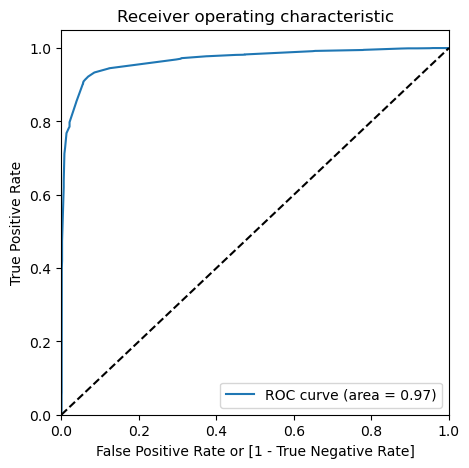

In [936]:
plt.figure(figsize=(15,15))
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.show();

A ROC of 0.97 indicates a very good predictive model. Now Let's find Optimal Cutoff Point
 

In [937]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.008680,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.613824,6795,1,1,1,1,1,1,1,1,0,0,0
2,0,0.008680,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.073946,8105,0,1,0,0,0,0,0,0,0,0,0
4,0,0.264789,3934,0,1,1,1,0,0,0,0,0,0,0


In [938]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.805040  0.968775  0.704148
0.2   0.2  0.902907  0.944444  0.877311
0.3   0.3  0.928881  0.915653  0.937031
0.4   0.4  0.929963  0.908759  0.943028
0.5   0.5  0.928571  0.902676  0.944528
0.6   0.6  0.920223  0.852798  0.961769
0.7   0.7  0.910019  0.798054  0.979010
0.8   0.8  0.903370  0.767640  0.987006
0.9   0.9  0.890229  0.727494  0.990505


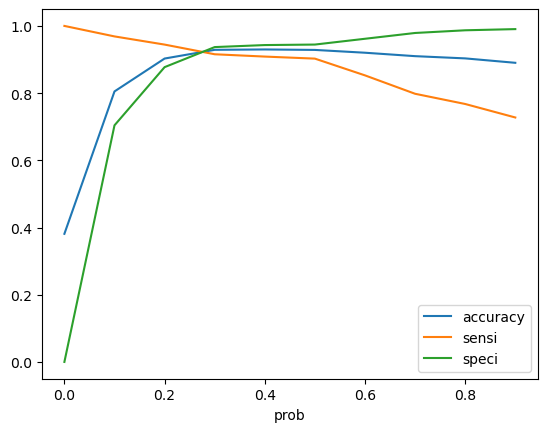

In [939]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [940]:
# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.008680,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.613824,6795,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.008680,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.073946,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.264789,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [941]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.008680,1871,0,1
1,0,0.613824,6795,1,61
2,0,0.008680,3516,0,1
3,0,0.073946,8105,0,7
4,0,0.264789,3934,0,26


In [942]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9288806431663574

In [943]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3750,  252],
       [ 208, 2258]], dtype=int64)

In [944]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [945]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9156528791565288

In [946]:
# Let us calculate specificity
TN / float(TN+FP)

0.9370314842578711

In [947]:
# Calculating False Postive Rate
print(FP/ float(TN+FP))

0.06296851574212893


In [948]:
# Positive predictive value 
print (TP / float(TP+FP))

0.899601593625498


In [949]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9474482061647297


In [950]:
#Checking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3750,  252],
       [ 208, 2258]], dtype=int64)

In [951]:
# Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.899601593625498

In [952]:
# Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9156528791565288

In [953]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [954]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

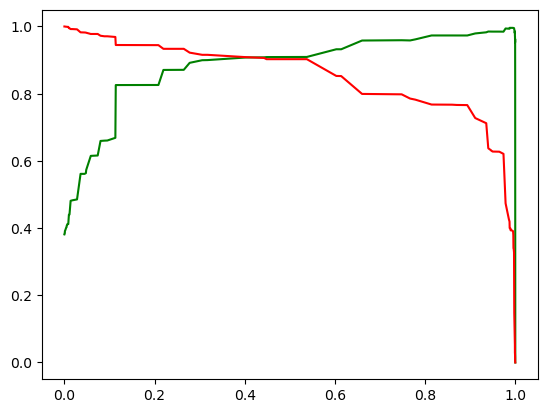

In [955]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [956]:
#scaling

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Lead Number,TotalVisits,Total_Time_on_Website,Page_Views_Per_Visit,lead_origin_Landing Page Submission,lead_origin_Others,lead_source_Google,lead_source_Olark Chat,lead_source_Organic Search,lead_source_Others,lead_source_Reference,Specialization_Industry,Specialization_Management,occupation_Unemployed,occupation_Working Professional,City_Mumbai,City_Other Cities,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unknown,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Unknown,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Lead Profile_Unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4269,0.077023,8,0.933036,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2376,0.838399,0,-0.900812,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7766,-1.145965,5,-0.793792,5,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9199,-1.588331,0,-0.900812,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4359,0.031292,0,-0.900812,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [957]:
X_test = X_test[col]
X_test.head()

4269    0
2376    0
7766    0
9199    0
4359    0
Name: Last Notable Activity_View in browser link Clicked, dtype: int32

In [963]:
#RFE

log_reg = LogisticRegression()

rfe = RFE(log_reg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [964]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 49),
 ('TotalVisits', False, 39),
 ('Total_Time_on_Website', False, 10),
 ('Page_Views_Per_Visit', False, 40),
 ('lead_origin_Landing Page Submission', False, 26),
 ('lead_origin_Others', False, 6),
 ('lead_source_Google', False, 38),
 ('lead_source_Olark Chat', False, 11),
 ('lead_source_Organic Search', False, 56),
 ('lead_source_Others', False, 30),
 ('lead_source_Reference', False, 25),
 ('Specialization_Industry', False, 53),
 ('Specialization_Management', False, 65),
 ('occupation_Unemployed', True, 1),
 ('occupation_Working Professional', True, 1),
 ('City_Mumbai', False, 43),
 ('City_Other Cities', False, 58),
 ('Last Activity_Converted to Lead', False, 24),
 ('Last Activity_Email Bounced', False, 9),
 ('Last Activity_Email Link Clicked', False, 34),
 ('Last Activity_Email Marked Spam', False, 62),
 ('Last Activity_Email Opened', False, 35),
 ('Last Activity_Email Received', False, 48),
 ('Last Activity_Form Submitted on Website', False, 36),
 ('Last Act

We can conclude with all the variables analyzed that is a very good predictive model

In [965]:
#analyzing the results of a regression model to see which variables have the most significant impact (with the largest coefficients)
res.params.sort_values(ascending=False)


Tags_Closed by Horizzon                     9.861031
Tags_Lost to EINS                           9.735182
Tags_Will revert after reading the email    6.587170
Tags_Unknown                                3.440163
occupation_Working Professional             2.723166
occupation_Unemployed                       2.522803
Last Activity_SMS Sent                      2.210436
Tags_Busy                                   2.021520
Last Notable Activity_Modified             -1.484640
Tags_Ringing                               -1.761289
Tags_switched off                          -2.227047
Tags_invalid number                        -2.294280
Lead Profile_Student of SomeSchool         -2.333218
const                                      -5.499550
dtype: float64